In [1]:
#imports
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime

path = "/Users/conorosully/Google Drive/My Drive/Medium/Seaborn Heatmap/{}"

# 0) Example 

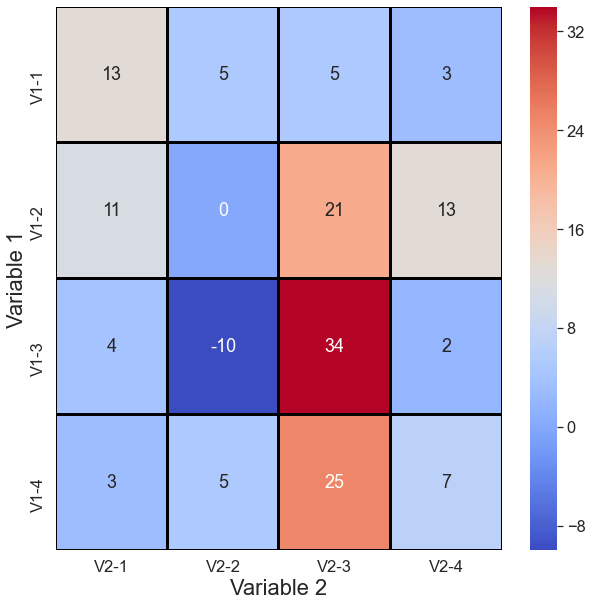

In [2]:
#Hard code matrix
conf_matrix = [[13,5,5,3],
[11,0,21,13],
[4,-10,34,2],
[3,5,25,7]]

#Create pandas dataframe with matrix
V1 = ['V1-1', 'V1-2', 'V1-3', 'V1-4']
V2 = ['V2-1', 'V2-2', 'V2-3', 'V2-4']
conf_matrix_df = pd.DataFrame(conf_matrix,columns=V2,index=V1)

#Plot example heatmap
plt.figure(figsize=(10, 10), facecolor='w', edgecolor='k')
sns.set(font_scale=1.5)
sns.heatmap(conf_matrix_df,
            cmap='coolwarm',
            annot=True,
            fmt='.5g', 
            linewidths=2,
            linecolor='black')
plt.xlabel('Variable 2',fontsize=22)
plt.ylabel('Variable 1',fontsize=22)


plt.savefig(path.format('example.png'),format='png',dpi=150)

# 1) Confusion Matrix

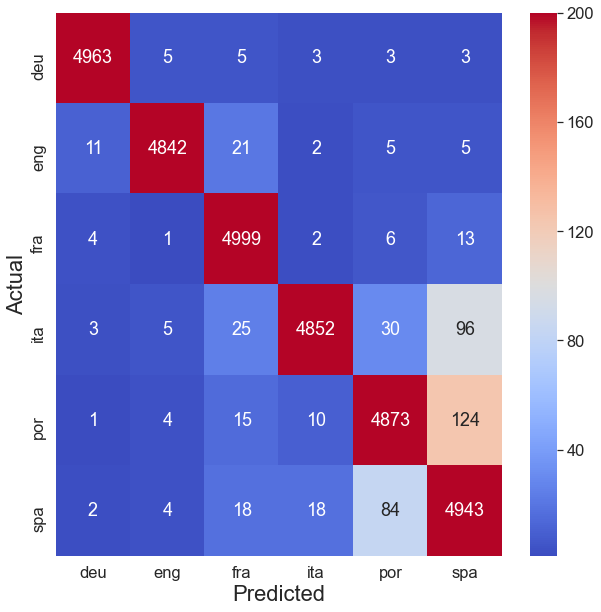

In [3]:
#Hard code confusion matrix
conf_matrix = [[4963,5,5,3,3,3],
[11,4842,21,2,5,5],
[4,1,4999,2,6,13],
[3,5,25,4852,30,96],
[1,4,15,10,4873,124],
[2,4,18,18,84,4943]]

#Create pandas dataframe with confusion matrix
lang = ['deu', 'eng', 'fra', 'ita', 'por', 'spa']
conf_matrix_df = pd.DataFrame(conf_matrix,columns=lang,index=lang)

#Plot confusion matrix heatmap
plt.figure(figsize=(10, 10))
sns.set(font_scale=1.5)

sns.heatmap(conf_matrix_df,
            cmap='coolwarm',
            annot=True,
            fmt='.5g',
            vmax=200)

plt.xlabel('Predicted',fontsize=22)
plt.ylabel('Actual',fontsize=22)

plt.savefig(path.format('confusion_matrix.png'),format='png',dpi=150)

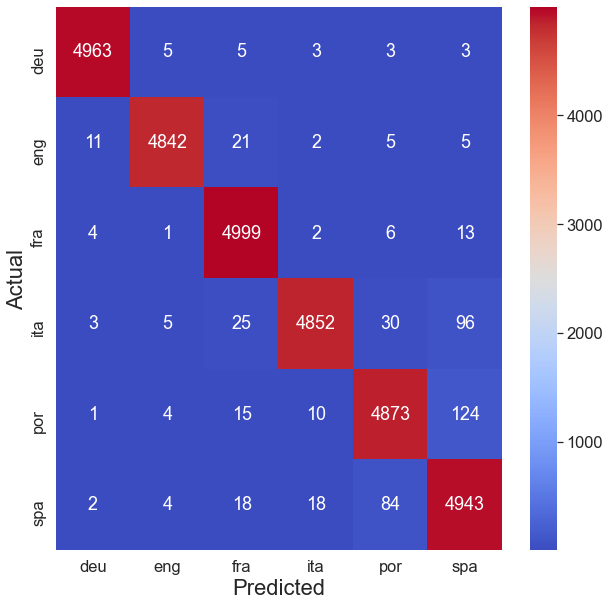

In [5]:
#Plot confusion matrix heatmap
plt.figure(figsize=(10, 10))
sns.set(font_scale=1.5)

sns.heatmap(conf_matrix_df,
            cmap='coolwarm',
            annot=True,
            fmt='.5g')

plt.xlabel('Predicted',fontsize=22)
plt.ylabel('Actual',fontsize=22)

plt.savefig(path.format('confusion_matrix_nomax.png'),format='png',dpi=150)

# 2) Movement between groups
Data: https://www.kaggle.com/datasets/sogun3/uspollution

In [38]:
#Load dataset
df = pd.read_csv("../data/pollution_us_2000_2016.csv",index_col=0)

#Create column with year of reading
date = [datetime.strptime(dt, '%Y-%m-%d') for dt in df['Date Local']]
df['year'] = [dt.year for dt in date]

/Users/conorosully/miniconda3/lib/python3.6/site-packages/numpy/lib/arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [13]:
def aqiGroup(aqi):
    """Return group name based on AQI values"""
    if  aqi <= 50:
        return 'Good'
    elif aqi <= 100:
        return 'Moderate'
    elif aqi <= 150:
        return 'Unhealthy \n(Sensitive Groups)'
    elif aqi <= 200:
        return 'Unhealthy'
    elif aqi <= 300:
        return 'Very Unhealthy'
    elif aqi <= 500:
        return 'Hazardous'  


In [39]:
#Get maximum O3 AQI for each city each year
df_max = df.groupby(['City','year'],as_index=False)['O3 AQI'].max()

#Get AQI group of maximum AQI value
df_max['AQI Group'] = [aqiGroup(aqi) for aqi in df_max['O3 AQI']]

# AQI groups in 2016
AQI_2016 = df_max[df_max.year==2016][['City','AQI Group']]
AQI_2016.columns = ['City','AQI 2016'] 

# AQI groups in 2010
AQI_2010 = df_max[df_max.year==2010][['City','AQI Group']]
AQI_2010.columns = ['City','AQI 2010'] 

# Join tables and replace missing values
AQI = AQI_2016.join(AQI_2010.set_index(['City']),how='outer',on=['City'])
AQI.fillna('Not operational',inplace=True)

AQI

,City,AQI 2016,AQI 2010
42,Arden-Arcade,Good,Unhealthy \n(Sensitive Groups)
69,Baton Rouge,Moderate,Unhealthy \n(Sensitive Groups)
85,Beltsville,Moderate,Not operational
108,Bethel Island,Moderate,Unhealthy \n(Sensitive Groups)
112,Birmingham,Unhealthy \n(Sensitive Groups),Not operational
132,Boston,Good,Moderate
186,Calexico,Moderate,Unhealthy \n(Sensitive Groups)
219,Capitan,Moderate,Unhealthy \n(Sensitive Groups)
252,Charlotte,Moderate,Unhealthy \n(Sensitive Groups)
289,Cincinnati,Moderate,Not operational


In [40]:
#NOTE: 'Very Unhealthy' and 'Hazardous'  groups have been exluded
groups = ['Good','Moderate','Unhealthy \n(Sensitive Groups)',
          'Unhealthy','Not operational']

# Create matrix of group counts
hm_array = []
for i in groups:
    hm_array_i = []
    for j in groups:
        df =  AQI[(AQI['AQI 2010']==i)&(AQI['AQI 2016']==j)]
        hm_array_i.append(len(df))  
    hm_array.append(hm_array_i)

# Create dataframe from matrix
hm_df = pd.DataFrame(hm_array,columns=groups,index=groups)

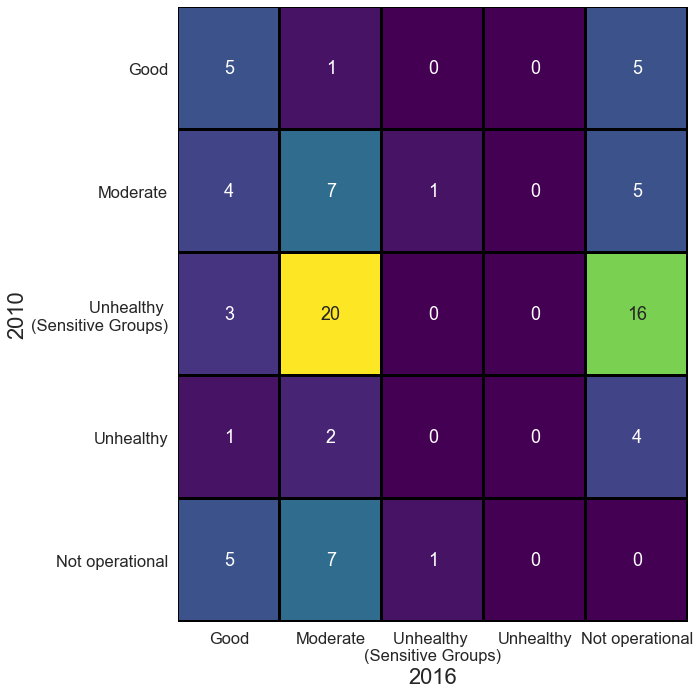

In [43]:
#Plot confusion matrix heatmap
plt.figure(figsize=(10, 10), facecolor='w', edgecolor='k')
sns.set(font_scale=1.5)

sns.heatmap(hm_df,
            cmap="viridis",
            annot=True,
            fmt='.5g',
            cbar=False,
            linewidths=2,
            linecolor='black')

plt.xlabel('2016',fontsize=22)
plt.ylabel('2010',fontsize=22)

plt.tight_layout()
plt.savefig(path.format('group_movements.png'),format='png',dpi=150,)

# 3) Temprature changes through time 
Data: https://datahub.io/core/global-temp

In [27]:
df = pd.read_csv("../data/monthly_csv.csv")

#Only use GISTEMP record
df = df[df.Source == 'GISTEMP']

#Get year and month of record
date = [datetime.strptime(dt, '%Y-%m-%d') for dt in df['Date']]
df['year'] = [dt.year for dt in date]
df['month'] = [dt.month for dt in date]

df.head()

,Source,Date,Mean,year,month
1,GISTEMP,2016-12-06,0.81,2016,12
3,GISTEMP,2016-11-06,0.93,2016,11
5,GISTEMP,2016-10-06,0.89,2016,10
7,GISTEMP,2016-09-06,0.87,2016,9
9,GISTEMP,2016-08-06,0.98,2016,8


In [29]:
years = range(1900,2017)
months = range(1,13)

# Create matrix of temprature values
hm_array = []
for m in months:
    hm_array_y = []
    for y in years:
        mean =  df[(df.year == y) & (df.month == m)]['Mean'] 
        mean = mean.to_numpy()[0]
        hm_array_y.append(mean)  
    hm_array.append(hm_array_y)
    
# Create dataframe from matrix
hm_df = pd.DataFrame(hm_array,columns=years,index=months)


,1900,1901,1902,1903,1904,1905,1906,1907,1908,1909,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
1,-0.40,-0.30,-0.19,-0.27,-0.64,-0.38,-0.31,-0.44,-0.46,-0.70,...,0.96,0.24,0.62,0.73,0.51,0.46,0.68,0.73,0.81,1.17
2,-0.08,-0.05,-0.03,-0.06,-0.55,-0.59,-0.34,-0.53,-0.36,-0.47,...,0.70,0.36,0.53,0.78,0.53,0.49,0.55,0.51,0.86,1.35
3,0.02,0.05,-0.29,-0.23,-0.46,-0.25,-0.15,-0.25,-0.58,-0.52,...,0.70,0.73,0.53,0.92,0.64,0.58,0.66,0.77,0.90,1.30
4,-0.14,-0.06,-0.27,-0.39,-0.50,-0.36,-0.02,-0.40,-0.46,-0.59,...,0.76,0.53,0.61,0.87,0.65,0.69,0.52,0.78,0.74,1.09
5,-0.06,-0.18,-0.31,-0.41,-0.50,-0.33,-0.21,-0.46,-0.40,-0.54,...,0.67,0.51,0.65,0.75,0.53,0.76,0.61,0.87,0.78,0.93
6,-0.15,-0.10,-0.34,-0.44,-0.49,-0.31,-0.22,-0.43,-0.39,-0.52,...,0.58,0.48,0.65,0.64,0.59,0.62,0.65,0.66,0.78,0.76
7,-0.09,-0.09,-0.26,-0.30,-0.48,-0.25,-0.27,-0.35,-0.35,-0.43,...,0.62,0.60,0.72,0.62,0.73,0.57,0.59,0.57,0.71,0.83
8,-0.04,-0.13,-0.28,-0.44,-0.43,-0.21,-0.19,-0.37,-0.45,-0.30,...,0.60,0.44,0.66,0.65,0.73,0.63,0.66,0.82,0.78,0.98
9,0.01,-0.17,-0.20,-0.43,-0.47,-0.15,-0.25,-0.32,-0.33,-0.37,...,0.64,0.65,0.70,0.61,0.56,0.76,0.78,0.90,0.81,0.87
10,0.08,-0.29,-0.27,-0.42,-0.35,-0.23,-0.20,-0.24,-0.43,-0.39,...,0.60,0.67,0.64,0.71,0.66,0.78,0.69,0.85,1.06,0.89


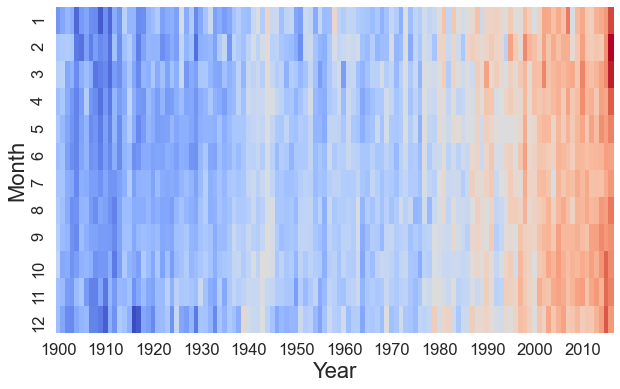

In [32]:
#Plot confusion matrix heatmap
plt.figure(figsize=(10, 6), facecolor='w', edgecolor='k')
sns.set(font_scale=1.5)

sns.heatmap(hm_df,
            cmap='coolwarm',
            cbar=False,
            xticklabels=10)

plt.xlabel('Year',fontsize=22)
plt.ylabel('Month',fontsize=22)

plt.savefig(path.format('temprature.png'),format='png',dpi=150)
plt.savefig(path.format('temprature_cover.png'),format='png',dpi=300)

# SHAP correlation matrix
Data: http://archive.ics.uci.edu/ml/datasets/Real+estate+valuation+data+set

In [34]:
#Load dataset
df = pd.read_csv("../data/Real estate valuation data set .csv",index_col=0)

#Create correlation matrix
corr_matrix = df.corr()

In [35]:
# Define mask used to cover squares above diagonal 
mask = []
for i in range(len(corr_matrix.columns)):
    mask_i = []
    for j in range(len(corr_matrix.columns)):
        if i>j:
            mask_i.append(True)
        else: 
            mask_i.append(False)
    mask.append(mask_i)

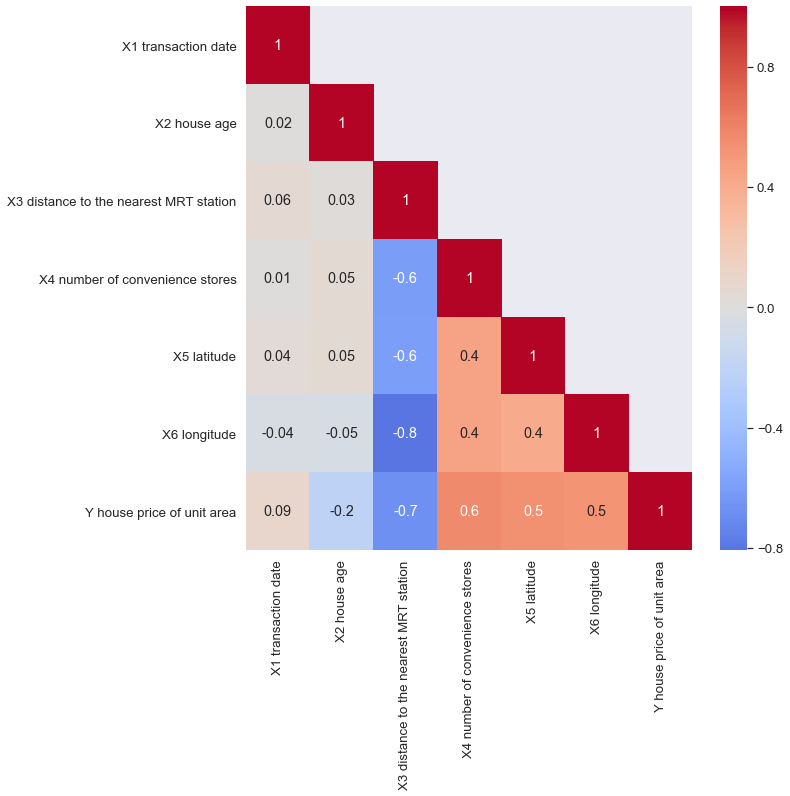

In [36]:
# Display Correlations
plt.figure(figsize=(10, 10), facecolor='w', edgecolor='k')
sns.set(font_scale=1.2)
sns.heatmap(corr_matrix,cmap='coolwarm',
            center = 0, 
            annot=True,
            fmt='.1g',
            mask=mask)

plt.savefig(path.format('correlation.png'),dpi=200,bbox_inches='tight')